# Band Structure

This notebook illustrates how to use the tools contained in crystal-function to:
- prepare a band input calculation
- run the calculation
- read the bands
- display the resulting band structure

In [1]:
import sys
sys.path.insert(1, '../crystal-functions/')

from cry_file_readwrite import Crystal_input, Crystal_bands
from cry_file_readwrite import write_cry_input, write_cry_properties
from cry_file_readwrite import Crystal_output
from cry_convert import cry_out2pmg, cry_bands2pmg
from cry_properties import cry_bands, cry_newk
from cry_execute import runcry, runprop

from pymatgen.symmetry.bandstructure import HighSymmKpath
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter

### Prepare the scf input

In [2]:
#Write input starting from blocks
#Define the blocks
geom_block = ['MGO BULK\n',
 'CRYSTAL\n',
 '0 0 0\n',
 '225\n',
 '4.217\n',
 '2\n',
 '12 0.    0.    0.\n',
 '8 0.5   0.5   0.5\n',
 'END\n']
bs_block = ['12 4\n',
 '0 0 8 2.0 1.0\n',
 ' 68370.0 0.0002226\n',
 ' 9661.0 0.001901\n',
 ' 2041.0 0.011042\n',
 ' 529.6 0.05005\n',
 ' 159.17 0.1690\n',
 ' 54.71 0.36695\n',
 ' 21.236 0.4008\n',
 ' 8.791 0.1487\n',
 '0 1 5 8.0 1.0\n',
 ' 143.7 -0.00671 0.00807\n',
 ' 31.27 -0.07927 0.06401\n',
 ' 9.661 -0.08088 0.2092\n',
 ' 3.726 0.2947 0.3460\n',
 ' 1.598 0.5714 0.3731\n',
 '0 1 1 2.0 1.0\n',
 ' 0.688 1.0 1.0\n',
 '0 1 1 0.0 1.0\n',
 ' 0.28 1.0 1.0\n',
 '8 4\n',
 '0 0 8 2.0 1.0\n',
 ' 8020.0 0.00108\n',
 ' 1338.0 0.00804\n',
 ' 255.4 0.05324\n',
 ' 69.22 0.1681\n',
 ' 23.90 0.3581\n',
 ' 9.264 0.3855\n',
 ' 3.851 0.1468\n',
 ' 1.212 0.0728\n',
 '0 1 4 6.0 1.0\n',
 ' 49.43 -0.00883 0.00958\n',
 ' 10.47 -0.0915 0.0696\n',
 ' 3.235 -0.0402 0.2065\n',
 ' 1.217 0.379 0.347\n',
 '0 1 1 0.0 1.0\n',
 ' 0.4764 1.0 1.0\n',
 '0 1 1 0.0 1.0\n',
 ' 0.1802 1.0 1.0\n',
 '99 0\n',
 'ENDBS\n']
func_block = ['DFT\n', 'B3LYP\n', 'XXLGRID\n', 'ENDDFT\n']
scf_block = [['TOLINTEG\n', '7 7 7 7 14\n'],
 ['SHRINK\n', '12 24\n'],
 ['MAXCYCLE\n', '200\n'],
 ['FMIXING\n', '70\n'],
 'DIIS\n',
 'ENDSCF\n']

#Write the input
input_name = 'data/mgo.d12'
write_cry_input(input_name,crystal_blocks=[geom_block,bs_block,func_block,scf_block])

In [3]:
!cat data/mgo.d12

MGO BULK
CRYSTAL
0 0 0
225
4.217
2
12 0.    0.    0.
8 0.5   0.5   0.5
END
12 4
0 0 8 2.0 1.0
 68370.0 0.0002226
 9661.0 0.001901
 2041.0 0.011042
 529.6 0.05005
 159.17 0.1690
 54.71 0.36695
 21.236 0.4008
 8.791 0.1487
0 1 5 8.0 1.0
 143.7 -0.00671 0.00807
 31.27 -0.07927 0.06401
 9.661 -0.08088 0.2092
 3.726 0.2947 0.3460
 1.598 0.5714 0.3731
0 1 1 2.0 1.0
 0.688 1.0 1.0
0 1 1 0.0 1.0
 0.28 1.0 1.0
8 4
0 0 8 2.0 1.0
 8020.0 0.00108
 1338.0 0.00804
 255.4 0.05324
 69.22 0.1681
 23.90 0.3581
 9.264 0.3855
 3.851 0.1468
 1.212 0.0728
0 1 4 6.0 1.0
 49.43 -0.00883 0.00958
 10.47 -0.0915 0.0696
 3.235 -0.0402 0.2065
 1.217 0.379 0.347
0 1 1 0.0 1.0
 0.4764 1.0 1.0
0 1 1 0.0 1.0
 0.1802 1.0 1.0
99 0
ENDBS
DFT
B3LYP
XXLGRID
ENDDFT
TOLINTEG
7 7 7 7 14
SHRINK
12 24
MAXCYCLE
200
FMIXING
70
DIIS
ENDSCF


### Run the scf calculation

In [4]:
#runcry(input_name)

In [5]:
!cat data/mgo.out

date Tue 14 Dec 2021 12:58:33 GMT
hostname MacBook-Pro-3.local
system Darwin MacBook-Pro-3.local 20.6.0 Darwin Kernel Version 20.6.0: Wed Jun 23 00:26:27 PDT 2021; root:xnu-7195.141.2~5/RELEASE_ARM64_T8101 x86_64
user brunocamino
output data in /Users/brunocamino/Desktop/Imperial/crystal-code-tools/crystal-integrated-notebooks/data/mgo.out
crystal executable in /Users/brunocamino/crystal
input data in /Users/brunocamino/Desktop/Imperial/crystal-code-tools/crystal-integrated-notebooks/data/mgo.d12
temporary directory /Users/brunocamino/crystal/tmp
MGO BULK
CRYSTAL
0 0 0
225
4.217
2
12 0.    0.    0.
8 0.5   0.5   0.5
END
12 4
0 0 8 2.0 1.0
 68370.0 0.0002226
 9661.0 0.001901
 2041.0 0.011042
 529.6 0.05005
 159.17 0.1690
 54.71 0.36695
 21.236 0.4008
 8.791 0.1487
0 1 5 8.0 1.0
 143.7 -0.00671 0.00807
 31.27 -0.07927 0.06401
 9.661 -0.08088 0.2092
 3.726 0.2947 0.3460
 1.598 0.5714 0.3731
0 1 1 2.0 1.0
 0.688 1.0 1.0
0 1 1 0.0 1.0
 0.28 1.0 1.0
8 4
0 0 8 2.0 1.0
 8020.0 0.00108
 1338.0 

### Prepare the band input

In [6]:
#Read the structure
mgo = Crystal_output('data/mgo.out')
mgo = cry_out2pmg(mgo)
mgo_prim = SpacegroupAnalyzer(mgo).get_primitive_standard_structure(international_monoclinic=False)

#Prepare the newk_block
newk_block = cry_newk(12,24)

#Obtain the k path object
k_path = HighSymmKpath(mgo_prim)

#Prepare the bands_block
n_kpoints = 200
first_band = 1
last_band = 26
bands_block = cry_bands(k_path,n_kpoints,first_band,last_band)

#Write the input
prop_input_name = 'data/mgo_BAND.d3'
write_cry_properties(prop_input_name,bands_block,newk_block)

In [7]:
!cat data/mgo_BAND.d3

NEWK
12 24
1 0
BAND
BAND STRUCTURE CALCULATION
11 8 200 1 26 1 0
0 0 0  4 0 4
4 0 4  4 2 5
4 2 5  2 2 5
2 2 5  0 0 0
0 0 0  4 4 4
4 4 4  5 2 5
5 2 5  4 2 5
4 2 5  4 4 4
4 4 4  2 2 5
2 2 5  5 2 5
5 2 5  4 0 4
END


### Run the band calculation

In [8]:
runprop(prop_input_name,input_name)

'data/mgo_BAND.outp calculation successfully completed'

### Read the bands

In [9]:
mgo_output = Crystal_output('data/mgo.out')
mgo_bands = Crystal_bands('data/mgo_BAND_dat.BAND')
mgo_bands.n_kpoints
labels=[item for sublist in k_path.kpath['path'] for item in sublist]
bs = cry_bands2pmg(mgo_output,mgo_bands,labels=labels)

In [10]:
len(k_path.kpath['path'][0])+len(k_path.kpath['path'][1])

12

### Plot the bands

<module 'matplotlib.pyplot' from '/Users/brunocamino/miniconda3/envs/cc/lib/python3.9/site-packages/matplotlib/pyplot.py'>

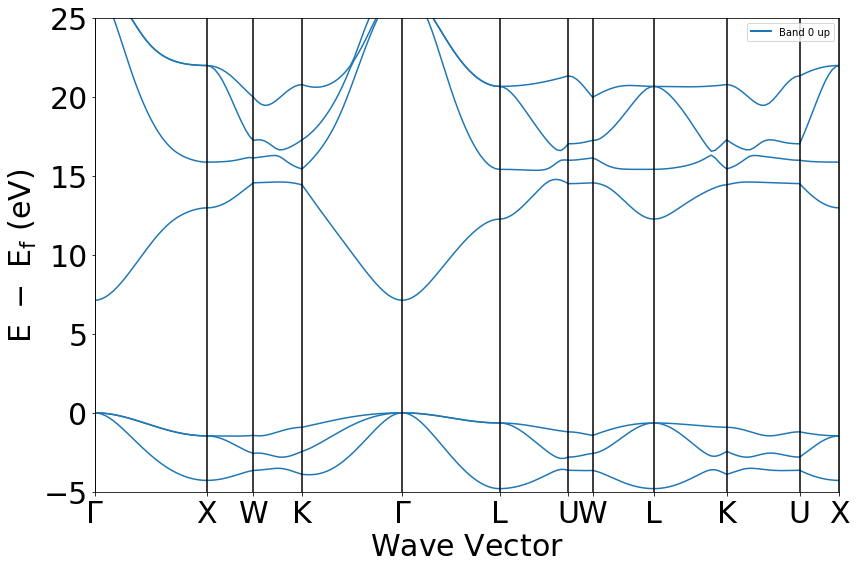

In [16]:
%matplotlib inline
bsplot = BSPlotter(bs)

bsplot.get_plot(ylim=(-5, 25), zero_to_efermi=True)